<a href="https://colab.research.google.com/github/lookmeebbear/GeoAI_DOL/blob/main/GeoAI_DOL_Prompt_GeoSAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Geospatial Segment Anything Model (GeoSAM) : Case Study at Chulalongkorn University (CU_GeoSAM)**

**Thepchai Srinoi, Thirawat Bunnakulpipat and Phisan Santitamnont**

**Department of Survey Engineering Chulalongkorn University**


___________________________________________________________________________

การสกัดข้อมูลรอยพิมพ์ฐานอาคารจากภาพถ่ายดัดแก้ออร์โธแท้จริง (true ortho-rectification photo) จากโครงการระบบสารสนเทศภูมิศาสตร์ภายในเมือง เสมือนจริง digital twin by 3d GIS MEA ของการไฟฟ้านครหลวง ตัวอย่างภาพในพื้นที่คณะวิศวกรรมศาสตร์ จุฬาลงกรณ์มหาวิทยาลัย

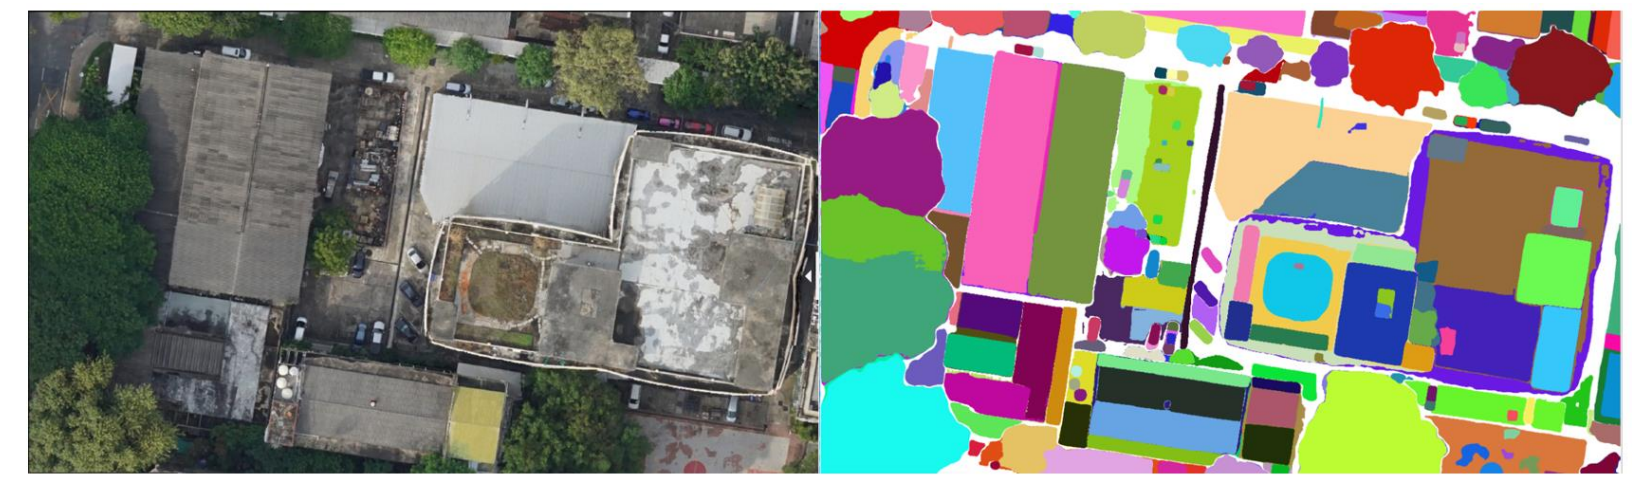



ผู้สนใจ true orthophoto, digital surface model และ 3d photogrammetric model อื่นๆ สามารถศึกษา ติดต่อ ขอข้อมูลได้จาก https://www.mea.or.th/public-relations/press-media/infographics/BRxWSmZZ4

Thanks you Associate Professor Dr. Qu Sheng Wu for this valuable technique.

The notebook is adapted from [segment-anything/notebooks/predictor_example.ipynb](https://github.com/opengeos/segment-anything/blob/pypi/notebooks/predictor_example.ipynb)

https://colab.research.google.com/github/opengeos/segment-geospatial/blob/main/docs/examples/input_prompts.ipynb

https://colab.research.google.com/github/opengeos/segment-geospatial/blob/main/docs/examples/text_prompts.ipynb

ลงเครื่องมือที่จำเป็น ชุดแรก

In [ ]:
%pip install segment-geospatial leafmap localtileserver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 862.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.3/263.3 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import leafmap
from samgeo import SamGeo
import pandas as pd

ดาวน์โหลดภาพออร์โธตัวอย่าง

In [ ]:
# Faculty of Engineering - Area 1
# Orthophoto https://drive.google.com/file/d/11L5jyr5EZSxVyRo3T00TOVh_dLGXTxHS/view?usp=drive_link
# convert full link to suitable link
!gdown https://drive.google.com/uc?id=11L5jyr5EZSxVyRo3T00TOVh_dLGXTxHS


Downloading...
From: https://drive.google.com/uc?id=11L5jyr5EZSxVyRo3T00TOVh_dLGXTxHS
To: /content/chula_engineering.tiff
100% 105M/105M [00:01<00:00, 69.5MB/s]


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

ดาวน์โหลดจุดตัวอย่างอาคาร

In [ ]:
# Building Point_Prompt Point
# https://drive.google.com/file/d/1L6MUGWNdswasdZU4Kq10nvmRbmqZG53B/view?usp=sharing
!gdown https://drive.google.com/uc?id=1L6MUGWNdswasdZU4Kq10nvmRbmqZG53B

Downloading...
From: https://drive.google.com/uc?id=1L6MUGWNdswasdZU4Kq10nvmRbmqZG53B
To: /content/engineering_pointprompt_2.csv
100% 341/341 [00:00<00:00, 1.86MB/s]


**Large Building Detection by LangSAM** เริ่มต้นสกัดอาคารขนาดใหญ่ก่อน โดย text prompt

In [ ]:
%pip install groundingdino-py pycrs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 5.1 MB/s eta 0:00:00
  Created wheel for groundingdino-py: filename=groundingdino_py-0.4.0-py2.py3-none-any.whl size=88735 sha256=503ea88e3739ee8b921fff681d61fc44654bed7c7a5f08d3222c50f65e280ac1
  Stored in directory: /root/.cache/pip/wheels/72/25/30/97b491abad279d329c62bef1e91bc56bf2fd40b22281068e1d
  Created wheel for pycrs: filename=PyCRS-1.0.2-py3-none-any.whl size=32687 sha256=f7a57d6ed8de9b8573de2075671f8eb4a7705dab6610db860e88a595ae3a4d33
  Stored in directory: /root/.cache/pip/wheels/47/1d/70/7a5bdf33347e7c75e95b06b1fa38f076a59a9506653cc24aff
Successfully built groundingdino-py pycrs


In [ ]:
from samgeo.text_sam import LangSAM
lang_sam = LangSAM()

GroundingDINO_SwinB.cfg.py:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

groundingdino_swinb_cogcoor.pth:   0%|          | 0.00/938M [00:00<?, ?B/s]

Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:21<00:00, 121MB/s]


กรอกตำแหน่งภาพ ชื่อวัตถุที่อยากสกัด และพารามิเตอร์การสกัดวัตถุ

In [ ]:
chula = '/content/chula_engineering.tiff'

# text prompt ใส่คำศัพท์วัตถุที่อยากสกัดออกมา
text_prompt = "building"
# box threshold
bt = 0.24
# text threshold
tt = 0.2

ดำเนินการสกัดรูปอาคาร LangSAM

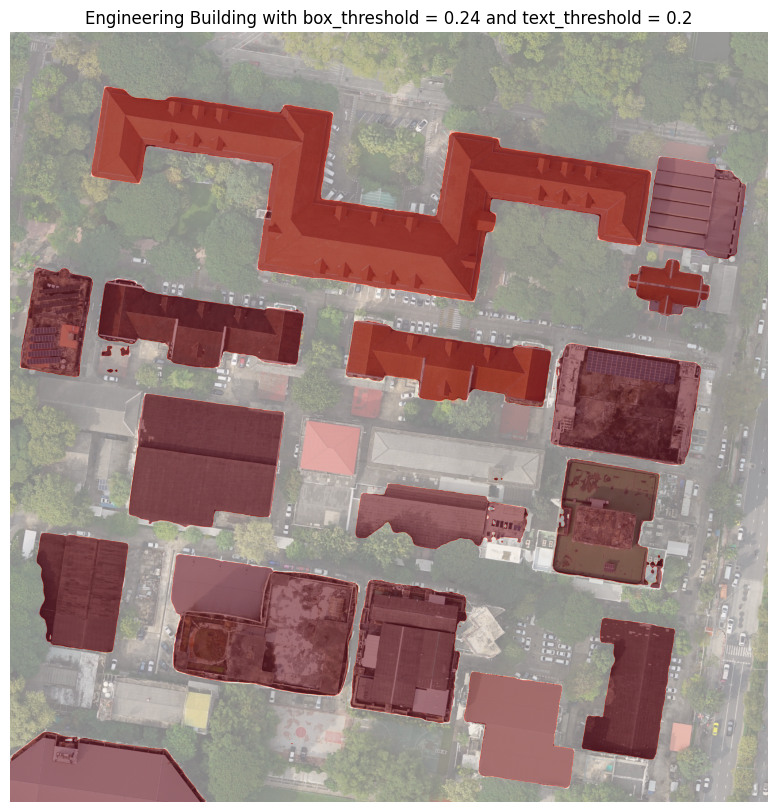

In [ ]:
lang_sam.predict(chula, text_prompt, box_threshold=bt, text_threshold=tt)
mytext = 'box_threshold = ' + str(bt) + ' and text_threshold = ' + str(tt)
mypara = 'bt'+str(bt)+'tt'+str(tt)
lang_sam.show_anns(cmap='Reds', add_boxes=False, alpha=0.5,
              title='Engineering Building with '+mytext,
              output='building_vidva'+mypara +'.tif')

แท้จริงแล้ว ผลการสกัดคือ ราสเตอร์กริดที่ระบายบริเวณที่เป็นอาคาร

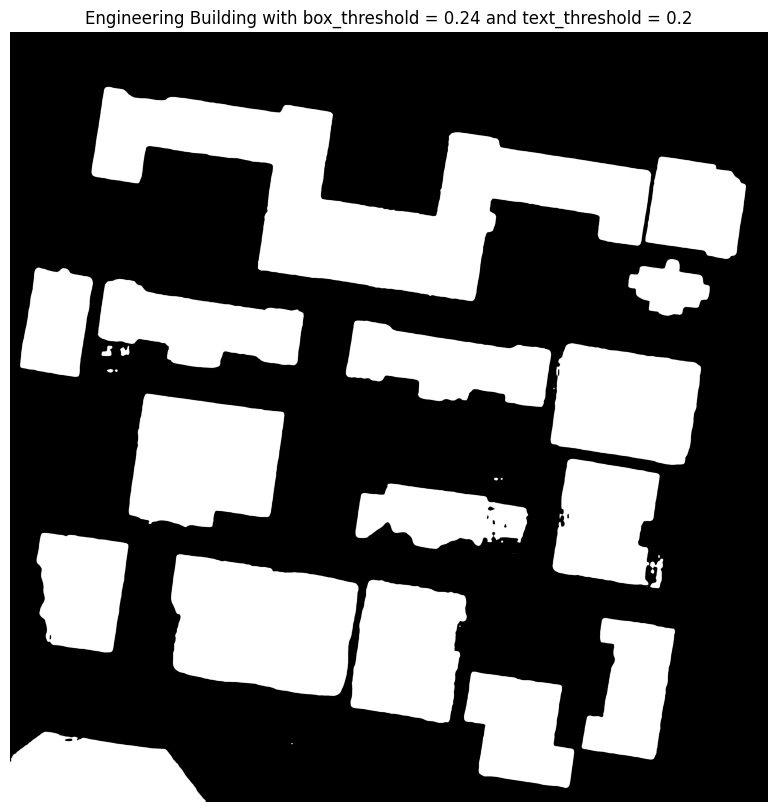

In [ ]:
# Greyscale visualization and output
lang_sam.show_anns(
    cmap='Greys_r',
    add_boxes=False,
    alpha=1,
    title='Engineering Building with '+mytext,
    blend=False,
    output='engineering.tif',
)

ราสเตอร์นี้แปลงเป็นเวกเตอร์รูปอาคารได้

In [ ]:
# Convert from raster to vector
lang_sam.raster_to_vector('engineering.tif', "eng_building.gpkg")

พบว่ายังมีรูปอาคารหลายหลังที่สกัดออกมาไม่ได้ จากนี้เป็นการสกัดรายอาคาร

**Small Scale Detection by Point Prompt GeoSAM**

ดาวน์โหลดโมเดลการสกัดอาคารรายจุดก่อน

In [ ]:
# Set `automatic=False` to disable the `SamAutomaticMaskGenerator` and enable the `SamPredictor`.

sam = SamGeo(
    model_type="vit_h",
    checkpoint="sam_vit_h_4b8939.pth",
    automatic=False,
    sam_kwargs=None,
)

เลือกภาพที่ทำการสกัด (Specify the image to segment)

In [ ]:
# engineering
sam.set_image(chula)

นำเข้าจุดที่นำมาสกัดรายอาคาร

In [ ]:
point = '/content/engineering_pointprompt_2.csv'

In [ ]:
df = pd.read_csv(point)
df = df[['X','Y']]
df

X          Y
0   100.534217  13.736706
1   100.533918  13.735201
2   100.533525  13.735954
3   100.533366  13.736184
4   100.533273  13.735988
5   100.532983  13.736065
6   100.532879  13.735632
7   100.532661  13.735792
8   100.532458  13.735439
9   100.532324  13.736169
10  100.532255  13.736344
11  100.532229  13.735505

จัดการสกัดรูปอาคารทีละหลังคา

In [ ]:
for index in range( len(df) ) :
  name = "BENG_"+str(index)
  df_select = df.iloc[[index]]
  df_select = df_select.reset_index(drop=True)
  pc = df_select.values.tolist()

  sam.predict(pc, point_labels=1, point_crs="EPSG:4326", output= name + ".tif")

  sam.raster_to_vector(name + ".tif", name + ".gpkg")
  print('building number ', index , 'finish')

building number  0 finish
building number  1 finish
building number  2 finish
building number  3 finish
building number  4 finish
building number  5 finish
building number  6 finish
building number  7 finish
building number  8 finish
building number  9 finish
building number  10 finish
building number  11 finish


รวมไฟล์ผลลัผธ์ (ขึ้นต้นด้วย BENG_xxxx) รวบทำไฟล์ zip

In [ ]:
!rm -r BENG_output

In [ ]:
!mkdir BENG_output
!cp BENG_* \BENG_output

cp: -r not specified; omitting directory 'BENG_output'


In [ ]:
!zip -r BENG_output.zip BENG_output

  adding: BENG_output/ (stored 0%)
  adding: BENG_output/BENG_11.gpkg (deflated 93%)
  adding: BENG_output/BENG_10.gpkg (deflated 93%)
  adding: BENG_output/BENG_3.gpkg (deflated 93%)
  adding: BENG_output/BENG_5.gpkg (deflated 93%)
  adding: BENG_output/BENG_8.gpkg (deflated 93%)
  adding: BENG_output/BENG_4.gpkg (deflated 92%)
  adding: BENG_output/BENG_8.tif (deflated 95%)
  adding: BENG_output/BENG_6.tif (deflated 92%)
  adding: BENG_output/BENG_1.gpkg (deflated 93%)
  adding: BENG_output/BENG_6.gpkg (deflated 92%)
  adding: BENG_output/BENG_10.tif (deflated 94%)
  adding: BENG_output/BENG_5.tif (deflated 94%)
  adding: BENG_output/BENG_9.tif (deflated 95%)
  adding: BENG_output/BENG_7.gpkg (deflated 93%)
  adding: BENG_output/BENG_1.tif (deflated 95%)
  adding: BENG_output/BENG_7.tif (deflated 94%)
  adding: BENG_output/BENG_4.tif (deflated 93%)
  adding: BENG_output/BENG_2.gpkg (deflated 93%)
  adding: BENG_output/BENG_3.tif (deflated 94%)
  adding: BENG_output/BENG_0.tif (deflat

อีกวิธี รวมทุก gpkg เป็นหนึ่งเดียว ... ลองอ่านทีละไฟล์ด้วย geopandas

In [ ]:
import geopandas as gpd
gdf = gpd.read_file('BENG_0.gpkg')
gdf

value                                           geometry
0  255.0  POLYGON ((665884.945 1519141.294, 665884.945 1...
1  255.0  POLYGON ((665886.095 1519113.844, 665886.095 1...

In [ ]:
for index in range( len(df) ) :
  file_name = 'BENG_'+str(index)+'.gpkg'
  if index == 0 :
    gdf = gpd.read_file( file_name )
  else :
    gdf_new = gpd.read_file( file_name )
    gdf = pd.concat([gdf, gdf_new])

gdf = gdf.reset_index(drop=True)
gdf

value                                           geometry
0   255.0  POLYGON ((665884.945 1519141.294, 665884.945 1...
1   255.0  POLYGON ((665886.095 1519113.844, 665886.095 1...
2   255.0  POLYGON ((665806.445 1518978.194, 665806.445 1...
3   255.0  POLYGON ((665841.895 1518977.594, 665841.895 1...
4   255.0  POLYGON ((665810.395 1519046.344, 665810.395 1...
5   255.0  POLYGON ((665808.545 1519061.394, 665808.545 1...
6   255.0  POLYGON ((665770.945 1519085.894, 665770.945 1...
7   255.0  POLYGON ((665766.295 1519064.444, 665766.295 1...
8   255.0  POLYGON ((665746.945 1519089.894, 665746.945 1...
9   255.0  POLYGON ((665736.495 1519038.194, 665736.495 1...
10  255.0  POLYGON ((665704.595 1519044.194, 665704.595 1...
11  255.0  POLYGON ((665680.495 1519003.294, 665680.495 1...
12  255.0  POLYGON ((665679.495 1519082.694, 665679.495 1...
13  255.0  POLYGON ((665658.245 1519103.444, 665658.245 1...
14  255.0  POLYGON ((665662.195 1519012.944, 665662.195 1...

รวมกันเป็น geopackage เดียว ที่มาจาก point prompt

In [ ]:
gdf.to_file('PPSAM_eng_addon.gpkg',driver="GPKG")

การแสดงผลรูปอาคารผ่าน folium ... web mapping

In [ ]:
import folium
m = folium.Map(location=[13.736743, 100.533152], zoom_start=20)

tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(m)

def plot_vector( gpd_file , color ):
  gpd_file = gpd_file.to_crs(epsg=4326)
  for _, r in gpd_file.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry'])
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,style_function=lambda x: {'fillColor': color })
    geo_j.add_to(m)

gdf_tp = gpd.read_file('eng_building.gpkg')

plot_vector( gdf_tp , 'red' )
plot_vector( gdf , 'blue' )

m
